In [1]:
import rmgpy.molecule as molecule
from IPython.display import display, HTML, Image, display_html
import time, sys

molList = [['O=[N][O]',2], # classic; tests rad jump exception for charge span filter
            ['[O][S]=O',2],
            ['[NH]N=S=O',7],
          ['N#[N+][O-]',2], # classic
          ['[CH2]OC([O])=O',1],  # important for testing. gave inf structures prior to filtering; solve by adding uncharged to generateLonePairMultipleBondResonanceStructures
          ['[CH2]SC([S])=O',5],  # important for testing, gave inf
          ['[CH2]SC([S])=S',3],
           ['[N+](=O)(O)[O-]',1],  # test HNO3 has 2 identical res, should get 1  
           ['[N+](=O)([O-])[O]',1],  # NO3 rad has 6 identical res, should get 1
           ['N[N]',2],  # test. birad
           ['[C]=C=O',2],  # test carbene birad in ally shift
          ['N(=[CH])[N]',2],  # test. rad and birad
           ['N(N)[N+](=O)[O-]',1],  # test. two charge separations
#           ['[N]=[SH]',2],
          ['[CH2]N=O',3],  # important test: tests allyl shift and lonepair-rad
          ['C=[C]C(=O)O[O]',2], # important for testing since gave some wierd predictions when code was off 
          ['N#S',1],  # can test that charged structures are filtered
       #   ['[C-]#[O+]',1],
          ['[O-][N+]#C',1],
          ['[N]=C=O',2],
       #   ['[N](=O)([NH+])[O-]',4],
          ['[CH]1C=NC=N1',3],  # interesting test for allyl
          ['C=C[CH][O]',3],  # important for testing, gave me trouble
          ['C1=C[CH]CC1([O])',2],
          ['[NH2+]=[N-]',1],
          ['N[NH]',2],
          ['[N]=NON=O',2],
          ['[NH-][N+]#N',2],  # azide
          ['CS[S+]([O-])C',1],
          ['N#[N+][S-](O)O',3],
          ['[S-][S+]=S',1],  # S3 vs. O3. interesting
          ['[O-][O+]=O',1],  # ozone
          ['OS(=O)[O]',2],  # HSO3
          ['CN[NH]',2],
          ['CO[O]',1],  # ROO - test we don't get R[O+.][O-]
          ['OS[O]',2],
          ['S[O]',2],
          ['N#[SH]',1],
          ['[S-]#[NH+]',1],
          ['[CH]=S',2], # HCO vs HCS, interesting
          ['[CH]=O',1],
          ['O[SH3+][O-]',1],
          ['[N]=S',2],  # NS vs. NO
          ['[N]=O',1],
          ['C[N+]([NH-])=O',2],
          ['[N]=C',1],
          ['N=C',1],
          ['N#C',1],
          ['[S][S]',1],
          ['[S][O]',1],
          ['C=C[CH]C=CC',3],
          ['CC=N[O]',3],
          ['[CH2-][S+]=C',1],  # C has a lonePair
          ['[CH-]=[SH2+]O',1],  # C has a lonePair
          ['[SH2+]#[C-]',1],  # C has a lonePair
          ['[N-]=[N+]=S(=O)=O',3],  # important test
          ['O=[S](=O)=O',1],
          ['[N-]=[S+]#N',1],
          ['O=S(=O)=O',1],  # SO3
          ['O=S=O',1],  # SO2 vs. ozone
          ['OS(O)(=O)=O',1],  # H2SO4
          ['O=[SH]#N',1],
          ['N#S#N',1],
          ['S=O',1],
          ['[S][O]',1],
#           ['C=C[CH]CC=C[CH]CC=C[CH]CC=C[CH]CC=C[CH]CC=C[CH]CC',64],
          ]

#check adjList:
# [C-]#[S+]   V
# [NH-]=[N]#[S+]=O



#molList = [['C=[C]C(=O)O[O]',1]]

#molList = [['[NH-][N+]#N',2]]
#adj = """1 C u0 p0 c0 {2,D} {6,S} {7,S}
#        2 C u0 p0 c0 {1,D} {3,S} {5,S}
#        3 O u1 p2 c0 {2,S}
#        4 O u0 p2 c0 {5,S} {8,S}
#        5 O u0 p2 c0 {2,S} {4,S}
#        6 H u0 p0 c0 {1,S}
#        7 H u0 p0 c0 {1,S}
#        8 H u0 p0 c0 {4,S}"""

#molList = [[molecule.Molecule().fromAdjacencyList(adj).toSMILES(),0]]




**********
Species O=[N][O] has 2 reactive resonance structures:



<Molecule "N(=O)[O]">
multiplicity 2
1 N u0 p1 c0 {2,D} {3,S}
2 O u0 p2 c0 {1,D}
3 O u1 p2 c0 {1,S}

atom N with val 8
atom O with val 8
atom O. with val 7
octet deviation: 1


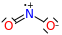

<Molecule "N(=O)[O]">
multiplicity 2
1 N u1 p0 c+1 {2,D} {3,S}
2 O u0 p2 c0 {1,D}
3 O u0 p3 c-1 {1,S}

atom N.+ with val 7
atom O with val 8
atom O- with val 8
octet deviation: 1



**********
Species [O][S]=O has 2 reactive resonance structures, which is WRONG, expected 1:



<Molecule "[S](=O)[O]">
multiplicity 3
1 S u1 p1 c0 {2,S} {3,D}
2 O u1 p2 c0 {1,S}
3 O u0 p2 c0 {1,D}

atom S. with val 9
atom O. with val 7
atom O with val 8
octet deviation: 2


<Molecule "S([O])[O]">
multiplicity 3
1 S u0 p2 c0 {2,S} {3,S}
2 O u1 p2 c0 {1,S}
3 O u1 p2 c0 {1,S}

atom S with val 8
atom O. with val 7
atom O. with val 7
octet deviation: 2



**********
Species [NH]N=S=O has 5 reactive resonance structures, which is WRONG, expected 7:



<Molecule "N(=S=O)[NH]">
multiplicity 2
1 N u0 p1 c0 {2,S} {3,D}
2 N u1 p1 c0 {1,S} {4,S}
3 S u0 p1 c0 {1,D} {5,D}
4 H u0 p0 c0 {2,S}
5 O u0 p2 c0 {3,D}

atom N with val 8
atom N. with val 7
atom S with val 10
atom O with val 8
octet deviation: 1


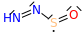

<Molecule "N(=N)[S]=O">
multiplicity 2
1 N u0 p1 c0 {2,D} {3,S}
2 N u0 p1 c0 {1,D} {4,S}
3 S u1 p1 c0 {1,S} {5,D}
4 H u0 p0 c0 {2,S}
5 O u0 p2 c0 {3,D}

atom N with val 8
atom N with val 8
atom S. with val 9
atom O with val 8
octet deviation: 1


<Molecule "N(=N)S[O]">
multiplicity 2
1 N u0 p1 c0 {2,D} {3,S}
2 N u0 p1 c0 {1,D} {4,S}
3 S u0 p2 c0 {1,S} {5,S}
4 H u0 p0 c0 {2,S}
5 O u1 p2 c0 {3,S}

atom N with val 8
atom N with val 8
atom S with val 8
atom O. with val 7
octet deviation: 1


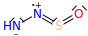

<Molecule "[N+](=S=O)[NH-]">
multiplicity 2
1 N u1 p0 c+1 {2,S} {3,D}
2 N u0 p2 c-1 {1,S} {4,S}
3 S u0 p1 c0 {1,D} {5,D}
4 H u0 p0 c0 {2,S}
5 O u0 p2 c0 {3,D}

atom N.+ with val 7
atom N- with val 8
atom S with val 10
atom O with val 8
octet deviation: 1


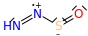

<Molecule "[N+](=N)[S-]=O">
multiplicity 2
1 N u1 p0 c+1 {2,D} {3,S}
2 N u0 p1 c0 {1,D} {4,S}
3 S u0 p2 c-1 {1,S} {5,D}
4 H u0 p0 c0 {2,S}
5 O u0 p2 c0 {3,D}

atom N.+ with val 7
atom N with val 8
atom S- with val 10
atom O with val 8
octet deviation: 1



**********
Species N#[N+][O-] has 2 reactive resonance structures:



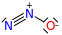

<Molecule "N#[N+][O-]">
1 N u0 p0 c+1 {2,T} {3,S}
2 N u0 p1 c0 {1,T}
3 O u0 p3 c-1 {1,S}

atom N+ with val 8
atom N with val 8
atom O- with val 8
octet deviation: 0


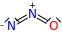

<Molecule "N#[N+][O-]">
1 N u0 p0 c+1 {2,D} {3,D}
2 N u0 p2 c-1 {1,D}
3 O u0 p2 c0 {1,D}

atom N+ with val 8
atom N- with val 8
atom O with val 8
octet deviation: 0



**********
Species [CH2]OC([O])=O has 1 reactive resonance structures:



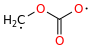

<Molecule "[CH2]OC([O])=O">
multiplicity 3
1 C u1 p0 c0 {3,S} {4,S} {5,S}
2 C u0 p0 c0 {3,S} {6,S} {7,D}
3 O u0 p2 c0 {1,S} {2,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 O u1 p2 c0 {2,S}
7 O u0 p2 c0 {2,D}

atom C. with val 7
atom C with val 8
atom O with val 8
atom O. with val 7
atom O with val 8
octet deviation: 2



**********
Species [CH2]SC([S])=O has 5 reactive resonance structures:



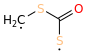

<Molecule "[CH2]SC(=O)[S]">
multiplicity 3
1 C u1 p0 c0 {3,S} {4,S} {5,S}
2 C u0 p0 c0 {3,S} {6,S} {7,D}
3 S u0 p2 c0 {1,S} {2,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 S u1 p2 c0 {2,S}
7 O u0 p2 c0 {2,D}

atom C. with val 7
atom C with val 8
atom S with val 8
atom S. with val 7
atom O with val 8
octet deviation: 2


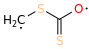

<Molecule "[CH2]SC(=S)[O]">
multiplicity 3
1 C u1 p0 c0 {3,S} {4,S} {5,S}
2 C u0 p0 c0 {3,S} {6,D} {7,S}
3 S u0 p2 c0 {1,S} {2,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 S u0 p2 c0 {2,D}
7 O u1 p2 c0 {2,S}

atom C. with val 7
atom C with val 8
atom S with val 8
atom S with val 8
atom O. with val 7
octet deviation: 2


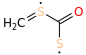

<Molecule "C=[S]C(=O)[S]">
multiplicity 3
1 C u0 p0 c0 {3,D} {4,S} {5,S}
2 C u0 p0 c0 {3,S} {6,S} {7,D}
3 S u1 p1 c0 {1,D} {2,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 S u1 p2 c0 {2,S}
7 O u0 p2 c0 {2,D}

atom C with val 8
atom C with val 8
atom S. with val 9
atom S. with val 7
atom O with val 8
octet deviation: 2


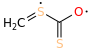

<Molecule "C=[S]C(=S)[O]">
multiplicity 3
1 C u0 p0 c0 {3,D} {4,S} {5,S}
2 C u0 p0 c0 {3,S} {6,D} {7,S}
3 S u1 p1 c0 {1,D} {2,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 S u0 p2 c0 {2,D}
7 O u1 p2 c0 {2,S}

atom C with val 8
atom C with val 8
atom S. with val 9
atom S with val 8
atom O. with val 7
octet deviation: 2


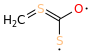

<Molecule "C=S=C([S])[O]">
multiplicity 3
1 C u0 p0 c0 {3,D} {4,S} {5,S}
2 C u0 p0 c0 {3,D} {6,S} {7,S}
3 S u0 p1 c0 {1,D} {2,D}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 S u1 p2 c0 {2,S}
7 O u1 p2 c0 {2,S}

atom C with val 8
atom C with val 8
atom S with val 10
atom S. with val 7
atom O. with val 7
octet deviation: 2



**********
Species [CH2]SC([S])=S has 3 reactive resonance structures:



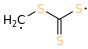

<Molecule "[CH2]SC(=S)[S]">
multiplicity 3
1 C u1 p0 c0 {3,S} {4,S} {5,S}
2 C u0 p0 c0 {3,S} {6,S} {7,D}
3 S u0 p2 c0 {1,S} {2,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 S u1 p2 c0 {2,S}
7 S u0 p2 c0 {2,D}

atom C. with val 7
atom C with val 8
atom S with val 8
atom S. with val 7
atom S with val 8
octet deviation: 2


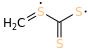

<Molecule "C=[S]C(=S)[S]">
multiplicity 3
1 C u0 p0 c0 {3,D} {4,S} {5,S}
2 C u0 p0 c0 {3,S} {6,S} {7,D}
3 S u1 p1 c0 {1,D} {2,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 S u1 p2 c0 {2,S}
7 S u0 p2 c0 {2,D}

atom C with val 8
atom C with val 8
atom S. with val 9
atom S. with val 7
atom S with val 8
octet deviation: 2


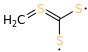

<Molecule "C=S=C([S])[S]">
multiplicity 3
1 C u0 p0 c0 {3,D} {4,S} {5,S}
2 C u0 p0 c0 {3,D} {6,S} {7,S}
3 S u0 p1 c0 {1,D} {2,D}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 S u1 p2 c0 {2,S}
7 S u1 p2 c0 {2,S}

atom C with val 8
atom C with val 8
atom S with val 10
atom S. with val 7
atom S. with val 7
octet deviation: 2



**********
Species [N+](=O)(O)[O-] has 1 reactive resonance structures:



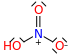

<Molecule "[N+](=O)(O)[O-]">
1 N u0 p0 c+1 {2,S} {3,D} {4,S}
2 O u0 p2 c0 {1,S} {5,S}
3 O u0 p2 c0 {1,D}
4 O u0 p3 c-1 {1,S}
5 H u0 p0 c0 {2,S}

atom N+ with val 8
atom O with val 8
atom O with val 8
atom O- with val 8
octet deviation: 0



**********
Species [N+](=O)([O-])[O] has 1 reactive resonance structures:



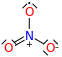

<Molecule "[N+](=O)([O-])[O]">
multiplicity 2
1 N u0 p0 c+1 {2,D} {3,S} {4,S}
2 O u0 p2 c0 {1,D}
3 O u0 p3 c-1 {1,S}
4 O u1 p2 c0 {1,S}

atom N+ with val 8
atom O with val 8
atom O- with val 8
atom O. with val 7
octet deviation: 1



**********
Species N[N] has 2 reactive resonance structures:



<Molecule "N[N]">
multiplicity 3
1 N u0 p1 c0 {2,S} {3,S} {4,S}
2 N u2 p1 c0 {1,S}
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}

atom N with val 8
atom N.. with val 6
octet deviation: 2


<Molecule "[NH2+][N-]">
multiplicity 3
1 N u1 p0 c+1 {2,S} {3,S} {4,S}
2 N u1 p2 c-1 {1,S}
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}

atom N.+ with val 7
atom N.- with val 7
octet deviation: 2



**********
Species [C]=C=O has 2 reactive resonance structures:



<Molecule "[C]=C=O">
multiplicity 3
1 C u0 p0 c0 {2,D} {3,D}
2 C u2 p0 c0 {1,D}
3 O u0 p2 c0 {1,D}

atom C with val 8
atom C.. with val 6
atom O with val 8
octet deviation: 2


<Molecule "[C]#C[O]">
multiplicity 3
1 C u0 p0 c0 {2,T} {3,S}
2 C u1 p0 c0 {1,T}
3 O u1 p2 c0 {1,S}

atom C with val 8
atom C. with val 7
atom O. with val 7
octet deviation: 2



**********
Species N(=[CH])[N] has 4 reactive resonance structures, which is WRONG, expected 2:



<Molecule "N(=[CH])[N]">
multiplicity 4
1 N u0 p1 c0 {2,D} {4,S}
2 C u1 p0 c0 {1,D} {3,S}
3 H u0 p0 c0 {2,S}
4 N u2 p1 c0 {1,S}

atom N with val 8
atom C. with val 7
atom N.. with val 6
octet deviation: 3


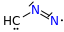

<Molecule "N(=[N])[CH]">
multiplicity 4
1 N u0 p1 c0 {2,S} {4,D}
2 C u2 p0 c0 {1,S} {3,S}
3 H u0 p0 c0 {2,S}
4 N u1 p1 c0 {1,D}

atom N with val 8
atom C.. with val 6
atom N. with val 7
octet deviation: 3


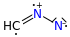

<Molecule "[N+](=[CH])[N-]">
multiplicity 4
1 N u1 p0 c+1 {2,D} {4,S}
2 C u1 p0 c0 {1,D} {3,S}
3 H u0 p0 c0 {2,S}
4 N u1 p2 c-1 {1,S}

atom N.+ with val 7
atom C. with val 7
atom N.- with val 7
octet deviation: 3


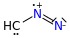

<Molecule "[N+](=[N-])[CH]">
multiplicity 4
1 N u1 p0 c+1 {2,S} {4,D}
2 C u2 p0 c0 {1,S} {3,S}
3 H u0 p0 c0 {2,S}
4 N u0 p2 c-1 {1,D}

atom N.+ with val 7
atom C.. with val 6
atom N- with val 8
octet deviation: 3



**********
Species N(N)[N+](=O)[O-] has 1 reactive resonance structures:



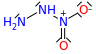

<Molecule "N(N)[N+](=O)[O-]">
1 N u0 p1 c0 {2,S} {3,S} {4,S}
2 N u0 p1 c0 {1,S} {7,S} {8,S}
3 N u0 p0 c+1 {1,S} {5,D} {6,S}
4 H u0 p0 c0 {1,S}
5 O u0 p2 c0 {3,D}
6 O u0 p3 c-1 {3,S}
7 H u0 p0 c0 {2,S}
8 H u0 p0 c0 {2,S}

atom N with val 8
atom N with val 8
atom N+ with val 8
atom O with val 8
atom O- with val 8
octet deviation: 0



**********
Species [CH2]N=O has 3 reactive resonance structures:



<Molecule "[CH2]N=O">
multiplicity 2
1 C u1 p0 c0 {2,S} {3,S} {4,S}
2 N u0 p1 c0 {1,S} {5,D}
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}
5 O u0 p2 c0 {2,D}

atom C. with val 7
atom N with val 8
atom O with val 8
octet deviation: 1


<Molecule "C=N[O]">
multiplicity 2
1 C u0 p0 c0 {2,D} {3,S} {4,S}
2 N u0 p1 c0 {1,D} {5,S}
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}
5 O u1 p2 c0 {2,S}

atom C with val 8
atom N with val 8
atom O. with val 7
octet deviation: 1


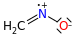

<Molecule "C=[N+][O-]">
multiplicity 2
1 C u0 p0 c0 {2,D} {3,S} {4,S}
2 N u1 p0 c+1 {1,D} {5,S}
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}
5 O u0 p3 c-1 {2,S}

atom C with val 8
atom N.+ with val 7
atom O- with val 8
octet deviation: 1



**********
Species C=[C]C(=O)O[O] has 2 reactive resonance structures:



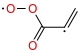

<Molecule "C=[C]C(=O)O[O]">
multiplicity 3
1 C u0 p0 c0 {3,S} {4,S} {5,D}
2 C u0 p0 c0 {3,D} {6,S} {7,S}
3 C u1 p0 c0 {1,S} {2,D}
4 O u0 p2 c0 {1,S} {8,S}
5 O u0 p2 c0 {1,D}
6 H u0 p0 c0 {2,S}
7 H u0 p0 c0 {2,S}
8 O u1 p2 c0 {4,S}

atom C with val 8
atom C with val 8
atom C. with val 7
atom O with val 8
atom O with val 8
atom O. with val 7
octet deviation: 2


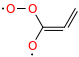

<Molecule "C=C=C([O])O[O]">
multiplicity 3
1 C u0 p0 c0 {3,D} {4,S} {5,S}
2 C u0 p0 c0 {3,D} {6,S} {7,S}
3 C u0 p0 c0 {1,D} {2,D}
4 O u0 p2 c0 {1,S} {8,S}
5 O u1 p2 c0 {1,S}
6 H u0 p0 c0 {2,S}
7 H u0 p0 c0 {2,S}
8 O u1 p2 c0 {4,S}

atom C with val 8
atom C with val 8
atom C with val 8
atom O with val 8
atom O. with val 7
atom O. with val 7
octet deviation: 2



**********
Species N#S has 1 reactive resonance structures:



<Molecule "S#N">
1 S u0 p1 c0 {2,T} {3,S}
2 N u0 p1 c0 {1,T}
3 H u0 p0 c0 {1,S}

atom S with val 10
atom N with val 8
octet deviation: 0



**********
Species [O-][N+]#C has 1 reactive resonance structures:



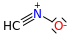

<Molecule "[N+](#C)[O-]">
1 N u0 p0 c+1 {2,T} {3,S}
2 C u0 p0 c0 {1,T} {4,S}
3 O u0 p3 c-1 {1,S}
4 H u0 p0 c0 {2,S}

atom N+ with val 8
atom C with val 8
atom O- with val 8
octet deviation: 0



**********
Species [N]=C=O has 2 reactive resonance structures:



<Molecule "C(=[N])=O">
multiplicity 2
1 C u0 p0 c0 {2,D} {3,D}
2 N u1 p1 c0 {1,D}
3 O u0 p2 c0 {1,D}

atom C with val 8
atom N. with val 7
atom O with val 8
octet deviation: 1


<Molecule "C(#N)[O]">
multiplicity 2
1 C u0 p0 c0 {2,T} {3,S}
2 N u0 p1 c0 {1,T}
3 O u1 p2 c0 {1,S}

atom C with val 8
atom N with val 8
atom O. with val 7
octet deviation: 1



**********
Species [CH]1C=NC=N1 has 3 reactive resonance structures:



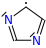

<Molecule "[CH]1C=NC=N1">
multiplicity 2
1 C u1 p0 c0 {2,S} {5,S} {6,S}
2 C u0 p0 c0 {1,S} {4,D} {7,S}
3 C u0 p0 c0 {4,S} {5,D} {8,S}
4 N u0 p1 c0 {2,D} {3,S}
5 N u0 p1 c0 {1,S} {3,D}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {2,S}
8 H u0 p0 c0 {3,S}

atom C. with val 7
atom C with val 8
atom C with val 8
atom N with val 8
atom N with val 8
octet deviation: 1


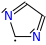

<Molecule "C1=N[CH]N=C1">
multiplicity 2
1 C u0 p0 c0 {2,S} {5,D} {6,S}
2 C u0 p0 c0 {1,S} {4,D} {7,S}
3 C u1 p0 c0 {4,S} {5,S} {8,S}
4 N u0 p1 c0 {2,D} {3,S}
5 N u0 p1 c0 {1,D} {3,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {2,S}
8 H u0 p0 c0 {3,S}

atom C with val 8
atom C with val 8
atom C. with val 7
atom N with val 8
atom N with val 8
octet deviation: 1


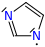

<Molecule "c1c[n]cn1">
multiplicity 2
1 C u0 p0 c0 {2,D} {5,S} {6,S}
2 C u0 p0 c0 {1,D} {4,S} {7,S}
3 C u0 p0 c0 {4,S} {5,D} {8,S}
4 N u1 p1 c0 {2,S} {3,S}
5 N u0 p1 c0 {1,S} {3,D}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {2,S}
8 H u0 p0 c0 {3,S}

atom C with val 8
atom C with val 8
atom C with val 8
atom N. with val 7
atom N with val 8
octet deviation: 1



**********
Species C=C[CH][O] has 3 reactive resonance structures:



<Molecule "C=C[CH][O]">
multiplicity 3
1 C u0 p0 c0 {2,D} {3,S} {4,S}
2 C u0 p0 c0 {1,D} {7,S} {8,S}
3 C u1 p0 c0 {1,S} {5,S} {6,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {3,S}
6 O u1 p2 c0 {3,S}
7 H u0 p0 c0 {2,S}
8 H u0 p0 c0 {2,S}

atom C with val 8
atom C with val 8
atom C. with val 7
atom O. with val 7
octet deviation: 2


<Molecule "[CH2]C=C[O]">
multiplicity 3
1 C u0 p0 c0 {2,S} {3,D} {4,S}
2 C u1 p0 c0 {1,S} {7,S} {8,S}
3 C u0 p0 c0 {1,D} {5,S} {6,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {3,S}
6 O u1 p2 c0 {3,S}
7 H u0 p0 c0 {2,S}
8 H u0 p0 c0 {2,S}

atom C with val 8
atom C. with val 7
atom C with val 8
atom O. with val 7
octet deviation: 2


<Molecule "[CH2][CH]C=O">
multiplicity 3
1 C u1 p0 c0 {2,S} {3,S} {4,S}
2 C u1 p0 c0 {1,S} {7,S} {8,S}
3 C u0 p0 c0 {1,S} {5,S} {6,D}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {3,S}
6 O u0 p2 c0 {3,D}
7 H u0 p0 c0 {2,S}
8 H u0 p0 c0 {2,S}

atom C. with val 7
atom C. with val 7
atom C with val 8
atom O with val 8
octet deviation: 2



**********
Species C1=C[CH]CC1([O]) has 2 reactive resonance structures:



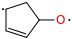

<Molecule "[O]C1C=C[CH]C1">
multiplicity 3
1  C u0 p0 c0 {2,S} {4,S} {7,S} {8,S}
2  C u0 p0 c0 {1,S} {3,S} {6,S} {9,S}
3  C u0 p0 c0 {2,S} {5,D} {11,S}
4  C u1 p0 c0 {1,S} {5,S} {10,S}
5  C u0 p0 c0 {3,D} {4,S} {12,S}
6  O u1 p2 c0 {2,S}
7  H u0 p0 c0 {1,S}
8  H u0 p0 c0 {1,S}
9  H u0 p0 c0 {2,S}
10 H u0 p0 c0 {4,S}
11 H u0 p0 c0 {3,S}
12 H u0 p0 c0 {5,S}

atom C with val 8
atom C with val 8
atom C with val 8
atom C. with val 7
atom C with val 8
atom O. with val 7
octet deviation: 2


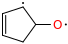

<Molecule "[O]C1[CH]C=CC1">
multiplicity 3
1  C u0 p0 c0 {2,S} {4,S} {7,S} {8,S}
2  C u0 p0 c0 {1,S} {3,S} {6,S} {9,S}
3  C u1 p0 c0 {2,S} {5,S} {11,S}
4  C u0 p0 c0 {1,S} {5,D} {10,S}
5  C u0 p0 c0 {3,S} {4,D} {12,S}
6  O u1 p2 c0 {2,S}
7  H u0 p0 c0 {1,S}
8  H u0 p0 c0 {1,S}
9  H u0 p0 c0 {2,S}
10 H u0 p0 c0 {4,S}
11 H u0 p0 c0 {3,S}
12 H u0 p0 c0 {5,S}

atom C with val 8
atom C with val 8
atom C. with val 7
atom C with val 8
atom C with val 8
atom O. with val 7
octet deviation: 2



**********
Species [NH2+]=[N-] has 1 reactive resonance structures:



<Molecule "[NH2+]=[N-]">
1 N u0 p0 c+1 {2,S} {3,S} {4,D}
2 H u0 p0 c0 {1,S}
3 H u0 p0 c0 {1,S}
4 N u0 p2 c-1 {1,D}

atom N+ with val 8
atom N- with val 8
octet deviation: 0



**********
Species N[NH] has 2 reactive resonance structures:



<Molecule "N[NH]">
multiplicity 2
1 N u0 p1 c0 {2,S} {3,S} {4,S}
2 N u1 p1 c0 {1,S} {5,S}
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {2,S}

atom N with val 8
atom N. with val 7
octet deviation: 1


<Molecule "[NH2+][NH-]">
multiplicity 2
1 N u1 p0 c+1 {2,S} {3,S} {4,S}
2 N u0 p2 c-1 {1,S} {5,S}
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {2,S}

atom N.+ with val 7
atom N- with val 8
octet deviation: 1



**********
Species [N]=NON=O has 2 reactive resonance structures:



<Molecule "O(N=[N])N=O">
multiplicity 2
1 O u0 p2 c0 {2,S} {3,S}
2 N u0 p1 c0 {1,S} {4,D}
3 N u0 p1 c0 {1,S} {5,D}
4 N u1 p1 c0 {2,D}
5 O u0 p2 c0 {3,D}

atom O with val 8
atom N with val 8
atom N with val 8
atom N. with val 7
atom O with val 8
octet deviation: 1


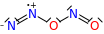

<Molecule "O([N+]=[N-])N=O">
multiplicity 2
1 O u0 p2 c0 {2,S} {3,S}
2 N u1 p0 c+1 {1,S} {4,D}
3 N u0 p1 c0 {1,S} {5,D}
4 N u0 p2 c-1 {2,D}
5 O u0 p2 c0 {3,D}

atom O with val 8
atom N.+ with val 7
atom N with val 8
atom N- with val 8
atom O with val 8
octet deviation: 1



**********
Species [NH-][N+]#N has 2 reactive resonance structures:



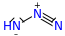

<Molecule "[NH-][N+]#N">
1 N u0 p2 c-1 {2,S} {3,S}
2 N u0 p0 c+1 {1,S} {4,T}
3 H u0 p0 c0 {1,S}
4 N u0 p1 c0 {2,T}

atom N- with val 8
atom N+ with val 8
atom N with val 8
octet deviation: 0


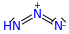

<Molecule "N=[N+]=[N-]">
1 N u0 p1 c0 {2,D} {3,S}
2 N u0 p0 c+1 {1,D} {4,D}
3 H u0 p0 c0 {1,S}
4 N u0 p2 c-1 {2,D}

atom N with val 8
atom N+ with val 8
atom N- with val 8
octet deviation: 0



**********
Species CS[S+]([O-])C has 1 reactive resonance structures:



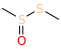

<Molecule "CS(=O)SC">
1  C u0 p0 c0 {3,S} {5,S} {6,S} {7,S}
2  C u0 p0 c0 {4,S} {8,S} {9,S} {10,S}
3  S u0 p1 c0 {1,S} {4,S} {11,D}
4  S u0 p2 c0 {2,S} {3,S}
5  H u0 p0 c0 {1,S}
6  H u0 p0 c0 {1,S}
7  H u0 p0 c0 {1,S}
8  H u0 p0 c0 {2,S}
9  H u0 p0 c0 {2,S}
10 H u0 p0 c0 {2,S}
11 O u0 p2 c0 {3,D}

atom C with val 8
atom C with val 8
atom S with val 10
atom S with val 8
atom O with val 8
octet deviation: 0


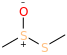

<Molecule "C[S+](SC)[O-]">
1  C u0 p0 c0 {3,S} {5,S} {6,S} {7,S}
2  C u0 p0 c0 {4,S} {8,S} {9,S} {10,S}
3  S u0 p1 c+1 {1,S} {4,S} {11,S}
4  S u0 p2 c0 {2,S} {3,S}
5  H u0 p0 c0 {1,S}
6  H u0 p0 c0 {1,S}
7  H u0 p0 c0 {1,S}
8  H u0 p0 c0 {2,S}
9  H u0 p0 c0 {2,S}
10 H u0 p0 c0 {2,S}
11 O u0 p3 c-1 {3,S}

atom C with val 8
atom C with val 8
atom S+ with val 8
atom S with val 8
atom O- with val 8
octet deviation: 0
reactive = False



**********
Species N#[N+][S-](O)O has 3 reactive resonance structures:



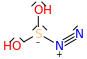

<Molecule "[S-]([N+]#N)(O)O">
1 S u0 p2 c-1 {2,S} {3,S} {4,S}
2 N u0 p0 c+1 {1,S} {5,T}
3 O u0 p2 c0 {1,S} {6,S}
4 O u0 p2 c0 {1,S} {7,S}
5 N u0 p1 c0 {2,T}
6 H u0 p0 c0 {3,S}
7 H u0 p0 c0 {4,S}

atom S- with val 10
atom N+ with val 8
atom O with val 8
atom O with val 8
atom N with val 8
octet deviation: 0


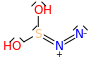

<Molecule "S(=[N+]=[N-])(O)O">
1 S u0 p1 c0 {2,D} {3,S} {4,S}
2 N u0 p0 c+1 {1,D} {5,D}
3 O u0 p2 c0 {1,S} {6,S}
4 O u0 p2 c0 {1,S} {7,S}
5 N u0 p2 c-1 {2,D}
6 H u0 p0 c0 {3,S}
7 H u0 p0 c0 {4,S}

atom S with val 10
atom N+ with val 8
atom O with val 8
atom O with val 8
atom N- with val 8
octet deviation: 0


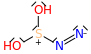

<Molecule "[S+](N=[N-])(O)O">
1 S u0 p1 c+1 {2,S} {3,S} {4,S}
2 N u0 p1 c0 {1,S} {5,D}
3 O u0 p2 c0 {1,S} {6,S}
4 O u0 p2 c0 {1,S} {7,S}
5 N u0 p2 c-1 {2,D}
6 H u0 p0 c0 {3,S}
7 H u0 p0 c0 {4,S}

atom S+ with val 8
atom N with val 8
atom O with val 8
atom O with val 8
atom N- with val 8
octet deviation: 0



**********
Species [S-][S+]=S has 1 reactive resonance structures:



<Molecule "S(=S)=S">
1 S u0 p1 c0 {2,D} {3,D}
2 S u0 p2 c0 {1,D}
3 S u0 p2 c0 {1,D}

atom S with val 10
atom S with val 8
atom S with val 8
octet deviation: 0


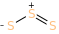

<Molecule "[S+](=S)[S-]">
1 S u0 p1 c+1 {2,S} {3,D}
2 S u0 p3 c-1 {1,S}
3 S u0 p2 c0 {1,D}

atom S+ with val 8
atom S- with val 8
atom S with val 8
octet deviation: 0
reactive = False



**********
Species [O-][O+]=O has 1 reactive resonance structures:



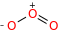

<Molecule "[O-][O+]=O">
1 O u0 p1 c+1 {2,S} {3,D}
2 O u0 p3 c-1 {1,S}
3 O u0 p2 c0 {1,D}

atom O+ with val 8
penalty for O4sc, O4dc, O4tc
atom O- with val 8
atom O with val 8
octet deviation: 1



**********
Species OS(=O)[O] has 2 reactive resonance structures:



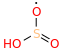

<Molecule "S(=O)(O)[O]">
multiplicity 2
1 S u0 p1 c0 {2,S} {3,D} {4,S}
2 O u0 p2 c0 {1,S} {5,S}
3 O u0 p2 c0 {1,D}
4 O u1 p2 c0 {1,S}
5 H u0 p0 c0 {2,S}

atom S with val 10
atom O with val 8
atom O with val 8
atom O. with val 7
octet deviation: 1


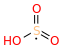

<Molecule "[S](=O)(=O)O">
multiplicity 2
1 S u1 p0 c0 {2,S} {3,D} {4,D}
2 O u0 p2 c0 {1,S} {5,S}
3 O u0 p2 c0 {1,D}
4 O u0 p2 c0 {1,D}
5 H u0 p0 c0 {2,S}

atom S. with val 11
atom O with val 8
atom O with val 8
atom O with val 8
octet deviation: 1



**********
Species CN[NH] has 2 reactive resonance structures:



<Molecule "CN[NH]">
multiplicity 2
1 C u0 p0 c0 {2,S} {4,S} {5,S} {6,S}
2 N u0 p1 c0 {1,S} {3,S} {7,S}
3 N u1 p1 c0 {2,S} {8,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {2,S}
8 H u0 p0 c0 {3,S}

atom C with val 8
atom N with val 8
atom N. with val 7
octet deviation: 1


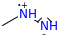

<Molecule "C[NH+][NH-]">
multiplicity 2
1 C u0 p0 c0 {2,S} {4,S} {5,S} {6,S}
2 N u1 p0 c+1 {1,S} {3,S} {7,S}
3 N u0 p2 c-1 {2,S} {8,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {2,S}
8 H u0 p0 c0 {3,S}

atom C with val 8
atom N.+ with val 7
atom N- with val 8
octet deviation: 1



**********
Species CO[O] has 1 reactive resonance structures:



<Molecule "CO[O]">
multiplicity 2
1 C u0 p0 c0 {2,S} {3,S} {4,S} {5,S}
2 O u0 p2 c0 {1,S} {6,S}
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 O u1 p2 c0 {2,S}

atom C with val 8
atom O with val 8
atom O. with val 7
octet deviation: 1



**********
Species OS[O] has 2 reactive resonance structures:



<Molecule "OS[O]">
multiplicity 2
1 O u0 p2 c0 {2,S} {4,S}
2 S u0 p2 c0 {1,S} {3,S}
3 O u1 p2 c0 {2,S}
4 H u0 p0 c0 {1,S}

atom O with val 8
atom S with val 8
atom O. with val 7
octet deviation: 1


<Molecule "O[S]=O">
multiplicity 2
1 O u0 p2 c0 {2,S} {4,S}
2 S u1 p1 c0 {1,S} {3,D}
3 O u0 p2 c0 {2,D}
4 H u0 p0 c0 {1,S}

atom O with val 8
atom S. with val 9
atom O with val 8
octet deviation: 1



**********
Species S[O] has 2 reactive resonance structures:



<Molecule "S[O]">
multiplicity 2
1 S u0 p2 c0 {2,S} {3,S}
2 O u1 p2 c0 {1,S}
3 H u0 p0 c0 {1,S}

atom S with val 8
atom O. with val 7
octet deviation: 1


<Molecule "[SH]=O">
multiplicity 2
1 S u1 p1 c0 {2,D} {3,S}
2 O u0 p2 c0 {1,D}
3 H u0 p0 c0 {1,S}

atom S. with val 9
atom O with val 8
octet deviation: 1



**********
Species N#[SH] has 1 reactive resonance structures:



<Molecule "S#N">
1 S u0 p1 c0 {2,T} {3,S}
2 N u0 p1 c0 {1,T}
3 H u0 p0 c0 {1,S}

atom S with val 10
atom N with val 8
octet deviation: 0



**********
Species [S-]#[NH+] has 1 reactive resonance structures:



<Molecule "N=S">
1 N u0 p1 c0 {2,D} {3,S}
2 S u0 p2 c0 {1,D}
3 H u0 p0 c0 {1,S}

atom N with val 8
atom S with val 8
octet deviation: 0


<Molecule "[NH+]#[S-]">
1 N u0 p0 c+1 {2,T} {3,S}
2 S u0 p2 c-1 {1,T}
3 H u0 p0 c0 {1,S}

atom N+ with val 8
atom S- with val 10
octet deviation: 0
reactive = False



**********
Species [CH]=S has 2 reactive resonance structures:



<Molecule "[CH]=S">
multiplicity 2
1 C u1 p0 c0 {2,S} {3,D}
2 H u0 p0 c0 {1,S}
3 S u0 p2 c0 {1,D}

atom C. with val 7
atom S with val 8
octet deviation: 1


<Molecule "C#[S]">
multiplicity 2
1 C u0 p0 c0 {2,S} {3,T}
2 H u0 p0 c0 {1,S}
3 S u1 p1 c0 {1,T}

atom C with val 8
atom S. with val 9
octet deviation: 1



**********
Species [CH]=O has 1 reactive resonance structures:



<Molecule "[CH]=O">
multiplicity 2
1 C u1 p0 c0 {2,S} {3,D}
2 H u0 p0 c0 {1,S}
3 O u0 p2 c0 {1,D}

atom C. with val 7
atom O with val 8
octet deviation: 1



**********
Species O[SH3+][O-] has 1 reactive resonance structures:



<Molecule "S(=O)O">
1 S u0 p0 c0 {2,S} {3,S} {4,S} {5,S} {6,D}
2 O u0 p2 c0 {1,S} {7,S}
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 O u0 p2 c0 {1,D}
7 H u0 p0 c0 {2,S}

atom S with val 12
atom O with val 8
atom O with val 8
octet deviation: 0


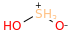

<Molecule "[SH3+](O)[O-]">
1 S u0 p0 c+1 {2,S} {3,S} {4,S} {5,S} {6,S}
2 O u0 p2 c0 {1,S} {7,S}
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 O u0 p3 c-1 {1,S}
7 H u0 p0 c0 {2,S}

atom S+ with val 10
atom O with val 8
atom O- with val 8
octet deviation: 2
reactive = False



**********
Species [N]=S has 2 reactive resonance structures:



<Molecule "[N]=S">
multiplicity 2
1 N u1 p1 c0 {2,D}
2 S u0 p2 c0 {1,D}

atom N. with val 7
atom S with val 8
octet deviation: 1


<Molecule "N#[S]">
multiplicity 2
1 N u0 p1 c0 {2,T}
2 S u1 p1 c0 {1,T}

atom N with val 8
atom S. with val 9
octet deviation: 1



**********
Species [N]=O has 1 reactive resonance structures:



<Molecule "[N]=O">
multiplicity 2
1 N u1 p1 c0 {2,D}
2 O u0 p2 c0 {1,D}

atom N. with val 7
atom O with val 8
octet deviation: 1



**********
Species C[N+]([NH-])=O has 1 reactive resonance structures, which is WRONG, expected 2:



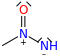

<Molecule "C[N+](=O)[NH-]">
1 C u0 p0 c0 {2,S} {4,S} {5,S} {6,S}
2 N u0 p0 c+1 {1,S} {3,S} {7,D}
3 N u0 p2 c-1 {2,S} {8,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 H u0 p0 c0 {1,S}
7 O u0 p2 c0 {2,D}
8 H u0 p0 c0 {3,S}

atom C with val 8
atom N+ with val 8
atom N- with val 8
atom O with val 8
octet deviation: 0



**********
Species [N]=C has 1 reactive resonance structures:



<Molecule "C=[N]">
multiplicity 2
1 C u0 p0 c0 {2,D} {3,S} {4,S}
2 N u1 p1 c0 {1,D}
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}

atom C with val 8
atom N. with val 7
octet deviation: 1



**********
Species N=C has 1 reactive resonance structures:



<Molecule "C=N">
1 C u0 p0 c0 {2,D} {3,S} {4,S}
2 N u0 p1 c0 {1,D} {5,S}
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {2,S}

atom C with val 8
atom N with val 8
octet deviation: 0



**********
Species N#C has 1 reactive resonance structures:



<Molecule "C#N">
1 C u0 p0 c0 {2,T} {3,S}
2 N u0 p1 c0 {1,T}
3 H u0 p0 c0 {1,S}

atom C with val 8
atom N with val 8
octet deviation: 0



**********
Species [S][S] has 2 reactive resonance structures, which is WRONG, expected 1:



<Molecule "[S][S]">
multiplicity 3
1 S u1 p2 c0 {2,S}
2 S u1 p2 c0 {1,S}

atom S. with val 7
atom S. with val 7
octet deviation: 2


<Molecule "[S][S]">
multiplicity 3
1 S u2 p1 c0 {2,D}
2 S u0 p2 c0 {1,D}

atom S.. with val 8
atom S with val 8
octet deviation: 2



**********
Species [S][O] has 2 reactive resonance structures, which is WRONG, expected 1:



<Molecule "[S][O]">
multiplicity 3
1 S u1 p2 c0 {2,S}
2 O u1 p2 c0 {1,S}

atom S. with val 7
atom O. with val 7
octet deviation: 2


<Molecule "S=O">
multiplicity 3
1 S u2 p1 c0 {2,D}
2 O u0 p2 c0 {1,D}

atom S.. with val 8
atom O with val 8
octet deviation: 2



**********
Species C=C[CH]C=CC has 3 reactive resonance structures:



<Molecule "C=C[CH]C=CC">
multiplicity 2
1  C u0 p0 c0 {2,S} {7,S} {8,S} {9,S}
2  C u0 p0 c0 {1,S} {3,D} {10,S}
3  C u0 p0 c0 {2,D} {4,S} {13,S}
4  C u1 p0 c0 {3,S} {5,S} {11,S}
5  C u0 p0 c0 {4,S} {6,D} {12,S}
6  C u0 p0 c0 {5,D} {14,S} {15,S}
7  H u0 p0 c0 {1,S}
8  H u0 p0 c0 {1,S}
9  H u0 p0 c0 {1,S}
10 H u0 p0 c0 {2,S}
11 H u0 p0 c0 {4,S}
12 H u0 p0 c0 {5,S}
13 H u0 p0 c0 {3,S}
14 H u0 p0 c0 {6,S}
15 H u0 p0 c0 {6,S}

atom C with val 8
atom C with val 8
atom C with val 8
atom C. with val 7
atom C with val 8
atom C with val 8
octet deviation: 1


<Molecule "C=CC=C[CH]C">
multiplicity 2
1  C u0 p0 c0 {2,S} {7,S} {8,S} {9,S}
2  C u1 p0 c0 {1,S} {3,S} {10,S}
3  C u0 p0 c0 {2,S} {4,D} {13,S}
4  C u0 p0 c0 {3,D} {5,S} {11,S}
5  C u0 p0 c0 {4,S} {6,D} {12,S}
6  C u0 p0 c0 {5,D} {14,S} {15,S}
7  H u0 p0 c0 {1,S}
8  H u0 p0 c0 {1,S}
9  H u0 p0 c0 {1,S}
10 H u0 p0 c0 {2,S}
11 H u0 p0 c0 {4,S}
12 H u0 p0 c0 {5,S}
13 H u0 p0 c0 {3,S}
14 H u0 p0 c0 {6,S}
15 H u0 p0 c0 {6,S}

atom C with val 8
atom C. with val 7
atom C with val 8
atom C with val 8
atom C with val 8
atom C with val 8
octet deviation: 1


<Molecule "[CH2]C=CC=CC">
multiplicity 2
1  C u0 p0 c0 {2,S} {7,S} {8,S} {9,S}
2  C u0 p0 c0 {1,S} {3,D} {10,S}
3  C u0 p0 c0 {2,D} {4,S} {13,S}
4  C u0 p0 c0 {3,S} {5,D} {11,S}
5  C u0 p0 c0 {4,D} {6,S} {12,S}
6  C u1 p0 c0 {5,S} {14,S} {15,S}
7  H u0 p0 c0 {1,S}
8  H u0 p0 c0 {1,S}
9  H u0 p0 c0 {1,S}
10 H u0 p0 c0 {2,S}
11 H u0 p0 c0 {4,S}
12 H u0 p0 c0 {5,S}
13 H u0 p0 c0 {3,S}
14 H u0 p0 c0 {6,S}
15 H u0 p0 c0 {6,S}

atom C with val 8
atom C with val 8
atom C with val 8
atom C with val 8
atom C with val 8
atom C. with val 7
octet deviation: 1



**********
Species CC=N[O] has 3 reactive resonance structures:



<Molecule "CC=N[O]">
multiplicity 2
1 C u0 p0 c0 {2,S} {4,S} {5,S} {6,S}
2 C u0 p0 c0 {1,S} {3,D} {7,S}
3 N u0 p1 c0 {2,D} {8,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {2,S}
8 O u1 p2 c0 {3,S}

atom C with val 8
atom C with val 8
atom N with val 8
atom O. with val 7
octet deviation: 1


<Molecule "C[CH]N=O">
multiplicity 2
1 C u0 p0 c0 {2,S} {4,S} {5,S} {6,S}
2 C u1 p0 c0 {1,S} {3,S} {7,S}
3 N u0 p1 c0 {2,S} {8,D}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {2,S}
8 O u0 p2 c0 {3,D}

atom C with val 8
atom C. with val 7
atom N with val 8
atom O with val 8
octet deviation: 1


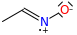

<Molecule "CC=[N+][O-]">
multiplicity 2
1 C u0 p0 c0 {2,S} {4,S} {5,S} {6,S}
2 C u0 p0 c0 {1,S} {3,D} {7,S}
3 N u1 p0 c+1 {2,D} {8,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {2,S}
8 O u0 p3 c-1 {3,S}

atom C with val 8
atom C with val 8
atom N.+ with val 7
atom O- with val 8
octet deviation: 1



**********
Species [CH2-][S+]=C has 1 reactive resonance structures:



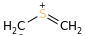

<Molecule "[CH2-][S+]=C">
1 C u0 p1 c-1 {3,S} {4,S} {5,S}
2 C u0 p0 c0 {3,D} {6,S} {7,S}
3 S u0 p1 c+1 {1,S} {2,D}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 H u0 p0 c0 {2,S}
7 H u0 p0 c0 {2,S}

atom C- with val 8
atom C with val 8
atom S+ with val 8
octet deviation: 0



**********
Species [CH-]=[SH2+]O has 1 reactive resonance structures:



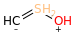

<Molecule "S(=[CH-])=[OH+]">
1 S u0 p0 c0 {2,D} {3,D} {4,S} {5,S}
2 C u0 p1 c-1 {1,D} {6,S}
3 O u0 p1 c+1 {1,D} {7,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 H u0 p0 c0 {2,S}
7 H u0 p0 c0 {3,S}

atom S with val 12
atom C- with val 8
atom O+ with val 8
penalty for O4sc, O4dc, O4tc
octet deviation: 1


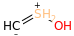

<Molecule "[SH2+](=[CH-])O">
1 S u0 p0 c+1 {2,D} {3,S} {4,S} {5,S}
2 C u0 p1 c-1 {1,D} {6,S}
3 O u0 p2 c0 {1,S} {7,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 H u0 p0 c0 {2,S}
7 H u0 p0 c0 {3,S}

atom S+ with val 10
atom C- with val 8
atom O with val 8
octet deviation: 2
reactive = False



**********
Species [SH2+]#[C-] has 1 reactive resonance structures:



<Molecule "S=[C]">
1 S u0 p1 c0 {2,S} {3,S} {4,D}
2 H u0 p0 c0 {1,S}
3 H u0 p0 c0 {1,S}
4 C u0 p1 c0 {1,D}

atom S with val 10
atom C with val 6
octet deviation: 2


<Molecule "[SH2+]#[C-]">
1 S u0 p0 c+1 {2,S} {3,S} {4,T}
2 H u0 p0 c0 {1,S}
3 H u0 p0 c0 {1,S}
4 C u0 p1 c-1 {1,T}

atom S+ with val 10
atom C- with val 8
octet deviation: 2
reactive = False



**********
Species [N-]=[N+]=S(=O)=O has 1 reactive resonance structures, which is WRONG, expected 3:



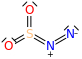

<Molecule "S(=[N+]=[N-])(=O)=O">
1 S u0 p0 c0 {2,D} {3,D} {4,D}
2 N u0 p0 c+1 {1,D} {5,D}
3 O u0 p2 c0 {1,D}
4 O u0 p2 c0 {1,D}
5 N u0 p2 c-1 {2,D}

atom S with val 12
atom N+ with val 8
atom O with val 8
atom O with val 8
atom N- with val 8
octet deviation: 0



**********
Species O=[S](=O)=O has 1 reactive resonance structures:



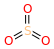

<Molecule "S(=O)(=O)=O">
1 S u0 p0 c0 {2,D} {3,D} {4,D}
2 O u0 p2 c0 {1,D}
3 O u0 p2 c0 {1,D}
4 O u0 p2 c0 {1,D}

atom S with val 12
atom O with val 8
atom O with val 8
atom O with val 8
octet deviation: 0



**********
Species [N-]=[S+]#N has 1 reactive resonance structures:



<Molecule "S(#N)#N">
1 S u0 p0 c0 {2,T} {3,T}
2 N u0 p1 c0 {1,T}
3 N u0 p1 c0 {1,T}

atom S with val 12
atom N with val 8
atom N with val 8
octet deviation: 0


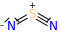

<Molecule "[S+](=[N-])#N">
1 S u0 p0 c+1 {2,D} {3,T}
2 N u0 p2 c-1 {1,D}
3 N u0 p1 c0 {1,T}

atom S+ with val 10
atom N- with val 8
atom N with val 8
octet deviation: 2
reactive = False



**********
Species O=S(=O)=O has 1 reactive resonance structures:



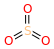

<Molecule "S(=O)(=O)=O">
1 S u0 p0 c0 {2,D} {3,D} {4,D}
2 O u0 p2 c0 {1,D}
3 O u0 p2 c0 {1,D}
4 O u0 p2 c0 {1,D}

atom S with val 12
atom O with val 8
atom O with val 8
atom O with val 8
octet deviation: 0



**********
Species O=S=O has 1 reactive resonance structures:



<Molecule "S(=O)=O">
1 S u0 p1 c0 {2,D} {3,D}
2 O u0 p2 c0 {1,D}
3 O u0 p2 c0 {1,D}

atom S with val 10
atom O with val 8
atom O with val 8
octet deviation: 0



**********
Species OS(O)(=O)=O has 1 reactive resonance structures:



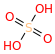

<Molecule "S(=O)(=O)(O)O">
1 S u0 p0 c0 {2,S} {3,S} {4,D} {5,D}
2 O u0 p2 c0 {1,S} {6,S}
3 O u0 p2 c0 {1,S} {7,S}
4 O u0 p2 c0 {1,D}
5 O u0 p2 c0 {1,D}
6 H u0 p0 c0 {2,S}
7 H u0 p0 c0 {3,S}

atom S with val 12
atom O with val 8
atom O with val 8
atom O with val 8
atom O with val 8
octet deviation: 0



**********
Species O=[SH]#N has 1 reactive resonance structures:



<Molecule "S(=O)#N">
1 S u0 p0 c0 {2,D} {3,S} {4,T}
2 O u0 p2 c0 {1,D}
3 H u0 p0 c0 {1,S}
4 N u0 p1 c0 {1,T}

atom S with val 12
atom O with val 8
atom N with val 8
octet deviation: 0



**********
Species N#S#N has 1 reactive resonance structures:



<Molecule "S(#N)#N">
1 S u0 p0 c0 {2,T} {3,T}
2 N u0 p1 c0 {1,T}
3 N u0 p1 c0 {1,T}

atom S with val 12
atom N with val 8
atom N with val 8
octet deviation: 0



**********
Species S=O has 1 reactive resonance structures:



<Molecule "S=O">
1 S u0 p2 c0 {2,D}
2 O u0 p2 c0 {1,D}

atom S with val 8
atom O with val 8
octet deviation: 0



**********
Species [S][O] has 2 reactive resonance structures, which is WRONG, expected 1:



<Molecule "[S][O]">
multiplicity 3
1 S u1 p2 c0 {2,S}
2 O u1 p2 c0 {1,S}

atom S. with val 7
atom O. with val 7
octet deviation: 2


<Molecule "S=O">
multiplicity 3
1 S u2 p1 c0 {2,D}
2 O u0 p2 c0 {1,D}

atom S.. with val 8
atom O with val 8
octet deviation: 2


In [2]:
# debug:
# %pdb

from rmgpy.molecule import filtration

for smiles in molList:
    t0 = time.time()
    mol = molecule.Molecule(SMILES=smiles[0])
    mol.update()
    #display(mol)
    #print mol.toAdjacencyList()
    res = molecule.resonance.generate_resonance_structures(mol, keep_isomorphic = False, filter_structures=True)
#     res = molecule.resonance.generate_resonance_structures(mol)
    reactive = sum([1 for mol2 in res if mol2.reactive])
    if reactive == smiles[1]:
        print "\n\n\n**********\nSpecies {0} has {1} reactive resonance structures:\n".format(
            smiles[0],reactive)
    else:
        print "\n\n\n**********\nSpecies {0} has {1} reactive resonance structures, which is WRONG, expected {2}:\n".format(
            smiles[0],reactive,smiles[1])
    for struc in res:
        display(struc)
        print "{0}".format(struc)
        print struc.toAdjacencyList()
        octetDeviation = 0  # reset for each mol
        for atom in struc.vertices:
            valance = 2 * (int(atom.getBondOrdersForAtom()) + atom.lonePairs) + atom.radicalElectrons
            if atom.isNonHydrogen():
                print "atom {0} with val {1}".format(atom,valance)
            if atom.isCarbon():
                octetDeviation += abs(8 - valance)  # octet on C
                if valance > 8:
                    octetDeviation += 1  # additional penalty for C with valance greater than 8 (as in [CH3-.][O+]=O)
                    print "penalty for C > 8"
            elif atom.isNitrogen():
                if atom.lonePairs:
                    octetDeviation += abs(8 - valance)  # octet on N p1/2/3
                    if atom.lonePairs == 3:
                        octetDeviation += 1  # additional penalty for N p3 (as in [NH2+][:::N-2], [NH+]#[N+][:::N-2])
                        print "penalty for N p3"
                else:
                    octetDeviation += min(abs(10 - valance),abs(8 - valance))  # octed/dectet for N p0
                    # N p0 could also be close to octet and not dectet, such as in O=[N+][O-]
                if valance > 8:
                    octetDeviation += 1  # additional penalty for N p0 with valance greater than 8 (as in O=[N.]=O,
                    # [NH2.]=[:NH.], N#N=O, N#[N.]O, CCN=N#N)
                    print "penalty for N > 8"
            if atom.isOxygen():
                octetDeviation += abs(8 - valance)  # octet on O
                if valance > 8:
                    octetDeviation += 1  # additional penalty for O with valance greater than 8 (as in O=[N+]=[O-.],
                    # CC=[N+]=[::O-.])
                    print "penalty for O > 8"
                if atom.atomType.label in ['O4sc','O4dc','O4tc']:
                    octetDeviation += 1  # additional penalty for charged O with a double/triple bond
                    # (as in [N-2][N+]#[O+], [O-]S#[O+], OS(S)([O-])#[O+], [OH+]=S(O)(=O)[O-];
                    # [C-]#[O+] and [O-][O+]=O which are correct structures also get penalized here, but that's OK
                    # since they are still selected as representative structures according to the rules here.)
                    print "penalty for O4sc, O4dc, O4tc"
            elif atom.isSulfur():
                if atom.lonePairs == 0 and not (valance == 10 and atom.charge == +1):
                    octetDeviation += abs(12 - valance)  # duodectet on S p0, eg O=S(=O)(O)O val 12,
                    # O[S](=O)=O val 11; allowing also dected c +1, eg O[S+](=O)(O)[O-] as having no deviation
                    if valance == 9:
                        octetDeviation += 1  # eg O[S+]([O-])=O val 9 is undesired
                        print "penalty for S p0 = 9"
                elif atom.lonePairs == 1:
                    octetDeviation += min(abs(8 - valance), abs(10 - valance))  # octet/dectet on S p1,
                    # eg [O-][S+]=O val 8, O[S]=O val 9, OS([O])=O val 10
                    if valance in [7,11]:
                        octetDeviation += 1  # eg O[S+][O-] val 7, N=[N+]=[S-]=O val 11 are undesired
                        print "penalty for S p1 val in 7,11"
                elif atom.lonePairs == 2:
                    octetDeviation += min(abs(8 - valance), abs(10 - valance))  # octet/dectet on S p2,
                    # eg [S][S] val 7, OS[O] val 8, [NH+]#[N+][S-][O-] val 9, O[S-](O)[N+]#N val 10
                    if valance == 11:
                        octetDeviation += 1  # eg [NH+]#[N+][S-2]=O val 11 is undesired
                        print "penalty for S p2 val = 11"
                elif atom.lonePairs == 3:
                    octetDeviation += abs(8 - valance)  # octet on S p3, eg [S-][O+]=O
                    if valance == 10:
                        octetDeviation += 1  # eg [NH+]#[N+][S-2][O] val 10 is undesired
                        print "penalty for S p3 = 10"
        print "octet deviation: {0}".format(filtration.get_octet_deviation(struc))
        if not struc.reactive:
            print "reactive = {0}".format(struc.reactive)